# 3. Preprocessing

In this notebook, we perform thorough preprocessing of the labeled tweets to prepare them for sentiment analysis. The preprocessing steps include cleaning the text data by removing URLs, mentions, hashtags, and special characters, as well as converting all text to lowercase. This ensures the data is in a consistent and clean format for subsequent modeling steps. The cleaned dataset is then saved for use in exploratory analysis and model training.

In [244]:
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [245]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from html import unescape
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('popular')
lm = nltk.WordNetLemmatizer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers 

In [246]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data

Given the privacy policy changes on Twitter, data gathering or scraping has limitations. The available data spans from June 2019 to February 2023. Analyzing this data provides a snapshot of public sentiment during that period regarding QRIS and Bank Indonesia.

We're using a powerful tool called BERT to understand what people are saying in comments about QRIS (Quick Response Code Indonesian Standard). BERT is like a language expert that's really good at grasping what words mean in different situations.

Now, there's a version of BERT called "Indo-BERT" that's specifically trained to understand Indonesian text. We're using this to teach the computer to figure out if comments are positive, negative, or neutral.

So, now we have labels on our data.

We take an extra step to make sure our computer is getting things right. After BERT processes the comments and assigns them a sentiment label (positive, negative, or neutral), I manually double-check these labels.

By doing this, we're making sure our analysis is accurate and reliable.

In [247]:
# import pandas as pd
# df=pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/labeled_qris_feb23_mei24.csv')
# # df2=pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/labeled_qris_juni19_dec22.csv')

In [248]:
df=pd.read_csv('data_final_29.csv')
df

,created_at,Komentar,Sentiment,Score,month_year
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa",positive,5.016.244.649.887.080,2023-03
1,2023-03-05 10:48:34+00:00,"@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet",negative,989.467.442.035.675,2023-03
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.",positive,8.306.553.959.846.490,2023-03
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?",neutral,9.959.661.960.601.800,2023-03
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah,negative,996.809.422.969.818,2023-08
...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan,neutral,9.753.036.499.023.430,2024-06
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96,neutral,8.691.744.804.382.320,2024-06
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet &amp; qris ️ dm or wa https://t.co/YFrFJ2AYtH https://t.co/ocomasMBc8,neutral,9.926.472.902.297.970,2024-06
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06


In [249]:
# Atur opsi tampilan supaya teks nggak terpotong
pd.set_option('display.max_colwidth', None)

# Tampilkan beberapa baris pertama dari kolom 'komentar' dengan baris baru di antaranya
print('\n\n'.join(df['Komentar'].head().tolist()))

# Tampilkan beberapa baris pertama dari kolom 'komentar' dengan baris baru di antaranya
print('\n\n'.join(df['Komentar'].tail().tolist()))

@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa

@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet

@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.

@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?

Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah
haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan

Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96

Di aku ready nih kak! Mu

In [259]:
# Count sentiment occurrences
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

neutral     5912
negative    1031
positive     771
Name: Sentiment, dtype: int64

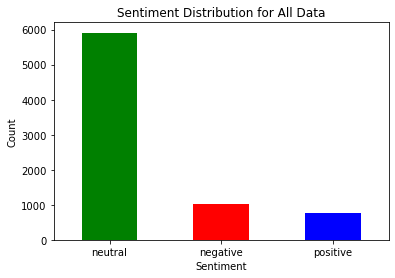

In [260]:
# Create a bar chart to visualize sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution for All Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

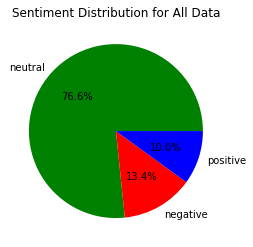

In [261]:
# Create a pie chart to visualize sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution for All Data')
plt.ylabel('')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


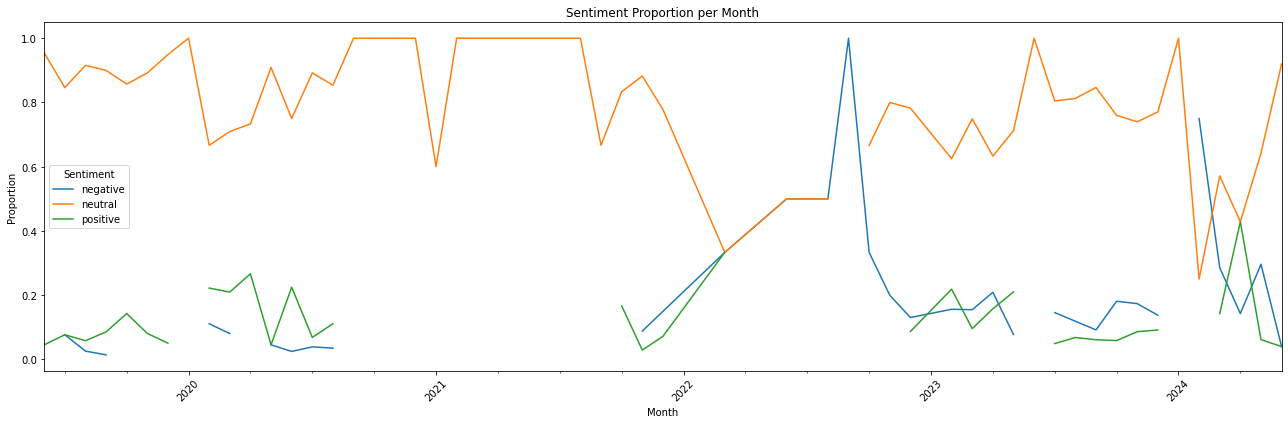

In [262]:
#Changing over time
# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract month and year from the 'created_at' column
df['month_year'] = df['created_at'].dt.to_period('M')  # Get month and year

# Group the data by month and sentiment
grouped_data = df.groupby(['month_year', 'Sentiment']).size().unstack()

# Calculate the proportion of each sentiment for each month
grouped_data = grouped_data.apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions over time
plt.figure(figsize=(18, 6))
grouped_data.plot(kind='line', ax=plt.gca())  # Use plt.gca() to get current axis for plotting
plt.title('Sentiment Proportion per Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [263]:
df[df['Sentiment'] == 'negative']

,created_at,Komentar,Sentiment,Score,month_year
1,2023-03-05 10:48:34+00:00,"@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet",negative,989.467.442.035.675,2023-03
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah,negative,996.809.422.969.818,2023-08
5,2023-03-01 03:44:42+00:00,"Oalah, pantes kemaren gabisa transaksi pake qris",negative,8.239.908.814.430.230,2023-03
9,2023-02-03 15:31:50+00:00,*mbeli gula* mw bayar tunai atau debit? bs pake qris? wow gkbisa dik tunai aja mending [tersenyum] ni 1jt dibayar tunai sahhh [tpuk tangan hadirin],negative,7.755.460.739.135.740,2023-02
10,2023-02-04 05:24:06+00:00,Orang Kristen tidak suka bayar tunai/cash karena dosa mereka dibayar dengan Jesus QRIS,negative,958.231.508.731.842,2023-02
...,...,...,...,...,...
7654,2024-05-21 14:43:19+00:00,Hanya bisa pakai QRIS kak pembayaran udah gabisa pake cash kalau mau pake cash harus uang pas (Bayar) ambil aja kembaliannya as tip. *gw dalam hati Ribet amat transaksi jaman skarang bawa cash 100juta masih berasa miskin gw susah mau dipake juga.,negative,991.338.849.067.688,2024-05
7660,2024-05-29 05:47:46+00:00,A: bisa pakai qris ya mbak? B: maaf kak sedang eror A: (mulai panik) transfer bisa? B: (tersenyum getir) gak bisa ya kak A: (panik beneran karena gak punya cash) B: mmm gpp kok kak A: gpp apa? B: bisa pesan dulu terus ditinggal ambil uang A: (kirain gpp kak ini gratis aja),negative,9.106.141.924.858.090,2024-05
7662,2024-05-29 12:16:34+00:00,Hari ini Qris ku jadi trus baru tau kalau ternyata duitnya enggak langsung masuk ke rekening. Transaksinya tadi jam 10 duitnya baru masuk jam 6. Googling sana sini baru tau lagi kalau memang demikian prosesnya. Kalau gitu kenapa ya orang2 mau dagang pakai Qris?,negative,9.609.487.652.778.620,2024-05
7664,2024-06-15 14:29:36+00:00,awoakwoak depresi 2 jam di jalan gamegang cash gabisa narik bensin abis gada warung yang bisa qris pas ngedorong tbtb ada yang bantuin terus gamau digantiin uangnya. thanks om ga sia-sia tangisku walau kelamaan https://t.co/UiiDBRudCf,negative,5.438.330.769.538.870,2024-06


In [264]:
df[df['Sentiment'] == 'positive']

,created_at,Komentar,Sentiment,Score,month_year
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa",positive,5.016.244.649.887.080,2023-03
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.",positive,8.306.553.959.846.490,2023-03
7,2023-02-18 05:30:06+00:00,Gak usah bingung milih jajan enak atau jajan murah lagi karena mimin udah punya solusinya! Kamu bisa minum enak tambah murah di Cincau Station sampai 28 FEB karena kalau bayar QRIS pakai ShopeePay bisa dapet CASHBACK 80% lohh! Cusss buruan jangan sampai kelewatan! https://t.co/MZ9asEx7mU,positive,9.303.252.696.990.960,2023-02
15,2023-02-06 02:00:31+00:00,BAYAR JAJANAN TINGGAL PAKAI QRIS karena semua #LebihMudahdiSeaBank! REPLY QRIS DI SEABANK DAN DOWNLOAD SEABANK SEKARANG https://t.co/ocgQEYhCQT buat dapetin KEUNTUNGAN lainnya dari SeaBank! #SeaBankID https://t.co/4hVlxQ7nnk,positive,6.893.223.524.093.620,2023-02
27,2023-02-16 08:00:01+00:00,Hah hari gini masih bayar pakai cash? ribet. Sekarang kemana-mana cukup bawa HP aja karna payment belanjaan kamu lebih gampang pakai QRis nya Allo Bank. Kalo kalian tipe cashless atau kemana2 harus pegang cash nih? Yuk komen dibawah ya! https://t.co/zMpSZgL8r6,positive,844.538.152.217.865,2023-02
...,...,...,...,...,...
7618,2022-12-27 11:37:51+00:00,Yukkk sebelum tahun baru balik nonton lagi ke bioskop karena sampai tanggal 31 Des kamu bisa dapetin CASHBACK 60% S/D 15RB kalau bayar QRIS pakai ShopeePay di CINEPOLIS! Cus berangkat ke Cinepolis terdekat dan jangan sampai ketinggalan promonya! #BayarQRISPakaiShopeePay https://t.co/xkkq0DMBW0,positive,6.220.551.133.155.820,2022-12
7636,2022-12-28 18:43:22+00:00,Sekarang banyak transaksi dilakuin pakai @gopayindonesia tapi sayang banget gak dapet XP. Kak bayar qris/merchant pakai gopay dapet xp dong,positive,5.880.023.837.089.530,2022-12
7645,2023-03-14 23:54:18+00:00,Alhamdulillah tiap hari naek metro kapsul ini dari pasteur ke ujung berung cuma 30 menit tanpa macet tarif hanya 5k bisa bayar pake emoney atau qris bisa juga pake bpjs bagi yg gak punya duit hatur nuhun pakgub,positive,9.248.756.170.272.820,2023-03
7690,2024-06-19 02:53:19+00:00,Sehat selalu ya pak tag || Georgia Thailand Pagii petrokimia gresik IPK 4 PBNU Pernah kok harganya bagus terus Daging LINK GACOR QRIS Elaelo || https://t.co/VvMW4iLV2w,positive,7.966.801.524.162.290,2024-06


In [265]:
df[df['Sentiment'] == 'neutral']

,created_at,Komentar,Sentiment,Score,month_year
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?",neutral,9.959.661.960.601.800,2023-03
6,2023-02-10 06:39:27+00:00,Wtb spotify pake akun sendiri need fast bisa bayar pake qris/bni #zonaba #zonauang️,neutral,9.968.036.413.192.740,2023-02
8,2023-02-03 00:49:51+00:00,Semalem berhasil bayar pake QRIS https://t.co/p4NAdXGMbi,neutral,989.645.779.132.843,2023-02
11,2023-02-04 05:24:06+00:00,ken arok kalo bayar pake qris mpu gandring,neutral,9.830.394.387.245.170,2023-02
12,2023-02-04 05:36:21+00:00,@Askrlfess Coba diliat ditatonya nder Kali aja ada qris Nah ntr bayar disitu aja,neutral,9.874.336.123.466.490,2023-02
...,...,...,...,...,...
7708,2024-06-24 04:26:13+00:00,leot aku sisa inii guyss aku disc yaa jadi 3k/each clearance sale (udh dari lama ga lakuu) :((( tekol jdi 15K boleh banget di giveaway atau personal use yaa :33 QRIS available~ #zonauang #zonajajan #zonabu https://t.co/QCZs6CqR5E,neutral,9.204.673.171.043.390,2024-06
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan,neutral,9.753.036.499.023.430,2024-06
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96,neutral,8.691.744.804.382.320,2024-06
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet &amp; qris ️ dm or wa https://t.co/YFrFJ2AYtH https://t.co/ocomasMBc8,neutral,9.926.472.902.297.970,2024-06


In [266]:
# # Path to save the CSV file on Google Drive
# save_path = '/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/data_20_24.csv'

# # Save the DataFrame to CSV
# df.to_csv(save_path, index=False)

## 2. Preprocessing

Preprocessing is what sentiment analysis is built on. A lot of the time, raw text data from places like social media is messy, noisy, and full of information that doesn’t matter. We need to clean and change this info in order to make sense of it. The accuracy of your sentiment analysis model can be greatly improved by doing the right preprocessing.

### 2.1 Text Cleaning

Text data, especially text from social media, can have parts that don’t have anything to do with the feeling we want to study. For example, hashtags (words or phrases that start with “#”), comments (usernames that start with “@”), and URLs (web links) are all parts that aren’t needed. It will be better to write without these words and sentences.

#### Remove Duplicate Tweets

In [267]:
# See how many duplicate tweets
df.duplicated().sum()

0

In [268]:
# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

In [269]:
df.dropna(subset=['Komentar'], inplace=True)
df

,created_at,Komentar,Sentiment,Score,month_year
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa",positive,5.016.244.649.887.080,2023-03
1,2023-03-05 10:48:34+00:00,"@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet",negative,989.467.442.035.675,2023-03
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.",positive,8.306.553.959.846.490,2023-03
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?",neutral,9.959.661.960.601.800,2023-03
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah,negative,996.809.422.969.818,2023-08
...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan,neutral,9.753.036.499.023.430,2024-06
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96,neutral,8.691.744.804.382.320,2024-06
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet &amp; qris ️ dm or wa https://t.co/YFrFJ2AYtH https://t.co/ocomasMBc8,neutral,9.926.472.902.297.970,2024-06
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06


### Data Cleaning


In [270]:
import re
import string
from html import unescape
from nltk.corpus import stopwords

# Download stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))  # Ganti 'indonesian' dengan bahasa yang lo pake

def clean_text(text):
    # Remove tab, new line, and back slice
    text = text.replace("\\t", " ").replace("\\n", " ").replace("\\u", " ").replace("\\", "")
    
    # Remove non ASCII
    text = text.encode("ascii", "replace").decode("ascii")
    
    # Decode HTML entities
    text = unescape(text)
    
    # Remove mention, link, and hashtag
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)  # Update regex untuk hapus mention dengan karakter underscore
    text = re.sub(r'[@#][A-Za-z0-9]+|\w+:\/\/\S+', ' ', text)  # Tetap hapus link dan hashtag
    
    # Remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Reduce word repetition to at most two consecutive characters
    text = re.sub(r'(.)\1+', r'\1', text)  # Mengurangi ke satu karakter saja
    
    # Remove superscript
    superscript_pattern = re.compile("["u"\U00002070"
                                     u"\U000000B9"
                                     u"\U000000B2-\U000000B3"
                                     u"\U00002074-\U00002079"
                                     u"\U0000207A-\U0000207E"
                                     u"\U0000200D"
                                     "]+", flags=re.UNICODE)
    text = superscript_pattern.sub('', text)
    
    # Remove laughter
    text = re.sub(r'\b(?:wkwk|haha|hehe|hihi|hoho|wkwkwk|ahahaha|hehehe|wkwkwkwkwk)\b', '', text, flags=re.IGNORECASE)
    
    # Reduce word repetition
    text = re.sub(r'(.)\1+', r'\1\1', text)
    
    # Reduce repeated words
    text = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1', text, flags=re.IGNORECASE)
    
    # Remove single-character words
    text = re.sub(r'\b\w\b', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    #Case Folding
    text=text.lower()
    
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [271]:
df['clean_text'] = df['Komentar'].apply(clean_text)
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td aman lancar jaya
1,2023-03-05 10:48:34+00:00,"@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet",negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode otomatis gitu kali nyoba gitu bete deh praktis jd ribet
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescrenlockscren langsung transaksi pake qris
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal teros pake qris males ah
...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris rulesnya rt twet dibawah end tba makasih help likert ya
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gacor paris modal ribu uang juta buktin
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet &amp; qris ️ dm or wa https://t.co/YFrFJ2AYtH https://t.co/ocomasMBc8,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris


### change slang into standard terms

In [272]:
slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['aah ', ' ah'], ['abis ', ' habis'], ['abng ', ' abang'], ['account ', ' akun'], ['ad ', ' ada'], ['adain ', ' bikin'], ['adl ', ' adalah'], ['adlah ', ' adalah'], ['adlh ', ' adalah'], ['adminnya ', ' admin nya'], ['adoh ', ' aduh'], ['adukan ', ' komplain'], ['aee ', ' aja'], ['afordable ', ' affordable'], ['aga ', ' agak'], ['agent ', ' agen'], ['agus ', ' hangus'], ['aj ', ' saja'], ['aja ', ' saja'], ['ajak2 ', ' ajak ajak'], ['ajh ', 'saja'], ['ajj ', ' saja'], ['ajuin ', ' mengajukan'], ['ak ', ' aku'], ['akn ', ' akan'], ['akuratin ', ' akurat in'], ['akutu ', ' aku tuh'], ['alamt ', ' alamat'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['alhamdullilah ', ' alhamdulillah'], ['alhmdulillah ', ' alhamdulillah'], ['alih2 ', ' alih alih'], ['all ', ' semua'], ['almat ', ' alamat'], ['almt ', ' alamat'], ['almtnya ', ' alamatnya'], ['alpukatnya ', ' alpukat nya'], ['alpulat ', ' alpukat'], ['al

In [273]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'aah': 'ah',
 'abis': 'habis',
 'abng': 'abang',
 'account': 'akun',
 'ad': 'ada',
 'adain': 'bikin',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'adminnya': 'admin nya',
 'adoh': 'aduh',
 'adukan': 'komplain',
 'aee': 'aja',
 'afordable': 'affordable',
 'aga': 'agak',
 'agent': 'agen',
 'agus': 'hangus',
 'aj': 'saja',
 'aja': 'saja',
 'ajak2': 'ajak ajak',
 'ajh': 'saja',
 'ajj': 'saja',
 'ajuin': 'mengajukan',
 'ak': 'aku',
 'akn': 'akan',
 'akuratin': 'akurat in',
 'akutu': 'aku tuh',
 'alamt': 'alamat',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'alhamdullilah': 'alhamdulillah',
 'alhmdulillah': 'alhamdulillah',
 'alih2': 'alih alih',
 'all': 'semua',
 'almat': 'alamat',
 'almt': 'alamat',
 'almtnya': 'alamatnya',
 'alpukatnya': 'alpukat nya',
 'alpulat': 'alpukat',
 'alumunium': 'aluminium',
 'ama': 'sama',
 'amanh': 'amanah',
 'ambilin': 'ambilkan',
 'ambl': 'ambil',
 'amerik': 'amarika',


In [274]:
from textblob import TextBlob
clean_text = []
for review in df['clean_text']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [275]:
df['final_text'] = clean_text
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td aman lancar jaya,mjb transaksi kak transaksi bayar pakai qris tadi aman lancar jaya
1,2023-03-05 10:48:34+00:00,"@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet",negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode otomatis gitu kali nyoba gitu bete deh praktis jd ribet,transaksi qris melalui bni tidak ya minimal scan barcode otomatis begitu kali mencoba begitu kesal deh praktis jadi rumit
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescrenlockscren langsung transaksi pake qris,keuntunganya praktis tinggal swipe up homescrenlockscren langsung transaksi pakai qris
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal teros pake qris males ah,sudah saya transaksi alfa alfa yang beda kota gagal teros pakai qris malas ah
...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris rulesnya rt twet dibawah end tba makasih help likert ya,hai ada saldo receh nominal rahasia akun bisnis qris rulesnya rt twet dibawah berakhir tba terima kasih help likert ya
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gacor paris modal ribu uang juta buktin,orang tidak tahu mencari uang segampang main slot gacor paris modal ribu uang juta buktin
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet &amp; qris ️ dm or wa https://t.co/YFrFJ2AYtH https://t.co/ocomasMBc8,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa,siap ini kak murah al ewalet qris direct message atau whatsapp
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris,netflix yang bisa qris


In [276]:
# To display all values in the 'Komentar' column
all_komentar_values = df['final_text'].head(5).tolist()

# Join the values into a single string with line breaks
formatted_komentar = '\n'.join(all_komentar_values)

# Print the formatted string
print(formatted_komentar)

mjb transaksi kak transaksi bayar pakai qris tadi aman lancar jaya
transaksi qris melalui bni tidak ya minimal scan barcode otomatis begitu kali mencoba begitu kesal deh praktis jadi rumit
keuntunganya praktis tinggal swipe up homescrenlockscren langsung transaksi pakai qris
kak pertamina bayar mengunakan qris tidak
sudah saya transaksi alfa alfa yang beda kota gagal teros pakai qris malas ah


In [277]:
# To display all values in the 'Komentar' column
all_komentar_values = df['final_text'].tail(5).tolist()

# Join the values into a single string with line breaks
formatted_komentar = '\n'.join(all_komentar_values)

# Print the formatted string
print(formatted_komentar)

hai ada saldo receh nominal rahasia akun bisnis qris rulesnya rt twet dibawah berakhir tba terima kasih help likert ya
orang tidak tahu mencari uang segampang main slot gacor paris modal ribu uang juta buktin
siap ini kak murah al ewalet qris direct message atau whatsapp
netflix yang bisa qris
giveaway saldo receh akun bisnis hanya qris rt rt pined mutualan berakhir secepatnya


### 3. Tokenization



Words make up text data, and we need to look at each word separately in order to figure out how people feel about something. Just that is what tokenization does. It takes a phrase and breaks it up into words.

In [278]:
def word_token(text):
  return word_tokenize(text)

df['token'] = df['final_text'].apply(lambda tokenize:word_token(str(tokenize)))
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td aman lancar jaya,mjb transaksi kak transaksi bayar pakai qris tadi aman lancar jaya,"[mjb, transaksi, kak, transaksi, bayar, pakai, qris, tadi, aman, lancar, jaya]"
1,2023-03-05 10:48:34+00:00,"@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet",negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode otomatis gitu kali nyoba gitu bete deh praktis jd ribet,transaksi qris melalui bni tidak ya minimal scan barcode otomatis begitu kali mencoba begitu kesal deh praktis jadi rumit,"[transaksi, qris, melalui, bni, tidak, ya, minimal, scan, barcode, otomatis, begitu, kali, mencoba, begitu, kesal, deh, praktis, jadi, rumit]"
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescrenlockscren langsung transaksi pake qris,keuntunganya praktis tinggal swipe up homescrenlockscren langsung transaksi pakai qris,"[keuntunganya, praktis, tinggal, swipe, up, homescrenlockscren, langsung, transaksi, pakai, qris]"
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"[kak, pertamina, bayar, mengunakan, qris, tidak]"
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal teros pake qris males ah,sudah saya transaksi alfa alfa yang beda kota gagal teros pakai qris malas ah,"[sudah, saya, transaksi, alfa, alfa, yang, beda, kota, gagal, teros, pakai, qris, malas, ah]"
...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris rulesnya rt twet dibawah end tba makasih help likert ya,hai ada saldo receh nominal rahasia akun bisnis qris rulesnya rt twet dibawah berakhir tba terima kasih help likert ya,"[hai, ada, saldo, receh, nominal, rahasia, akun, bisnis, qris, rulesnya, rt, twet, dibawah, berakhir, tba, terima, kasih, help, likert, ya]"
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gacor paris modal ribu uang juta buktin,orang tidak tahu mencari uang segampang main slot gacor paris modal ribu uang juta buktin,"[orang, tidak, tahu, mencari, uang, segampang, main, slot, gacor, paris, modal, ribu, uang, juta, buktin]"
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet &amp; qris ️ dm or wa https://t.co/YFrFJ2AYtH https://t.co/ocomasMBc8,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa,siap ini kak murah al ewalet qris direct message atau whatsapp,"[siap, ini, kak, murah, al, ewalet, qris, direct, message, atau, whatsapp]"
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris,netflix yang bisa qris,"[netflix, yang, bisa, qris]"


### 4. Remove Stopwords



Stopwords are common words that are frequently filtered out or excluded from text data during text analysis and natural language processing (NLP) tasks. Similar to English, these stopwords are considered to be of little value in understanding the content of the text because they do not carry significant meaning on their own and are primarily used for grammatical structure.

Examples of stopwords in Bahasa Indonesia include words like "dan" (and), "atau" (or), "saya" (I), "kamu" (you), "di" (in, at), "dari" (from), "untuk" (for), and many others.

In [279]:
# Menampilkan stopwords bahasa Indonesia dan Inggris
indonesian_stop = stopwords.words('indonesian')
english_stop = stopwords.words('english')
print('Length of Indonesian stopwords:', len(indonesian_stop))
print('Length of English stopwords:', len(english_stop))

# Tambahan stopwords spesifik untuk konteks QRIS dan media sosial
additional_stopwords = [
    "nih", "wts", "wtb", "nder", "eh","ya","sih", "deh", "dong", "sih", "tuh", "ya", "tapi", "yang", "kak", "min", "ah", "pls", "mjb", "bri", "spay", "ovo", "gopay", "bca",
    "pakai", "bni", "dana", "shopeepay", "transfer", "saldo","slot", "ga", "direct message", "whatsapp", "retweet", "gitu",
    "rt", "jastip","guys", "aku", "btw", "woi", "tweet", "inact","ba","bismillah", "halo", "hi","hai","follow", "dm", "wa", "thanks", "ya", "x", "likert", "kali", "receh", "bantu", "kasih", "help", "giveaway", "slot", "cuan", "only", "tba", "homescreenlockscreen"
]

# Gabungkan stopwords NLTK dengan stopwords tambahan
combined_stopwords = set(indonesian_stop).union(set(english_stop)).union(additional_stopwords)

# Fungsi untuk menghapus stopwords
def remove_stopwords(token_list, stopwords_set):
    tokenize = [token for token in token_list if token.lower() not in stopwords_set]
    return tokenize

df['stop_text'] = df['token'].apply(lambda x: remove_stopwords(x, combined_stopwords))

df


Length of Indonesian stopwords: 758
Length of English stopwords: 179


,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td aman lancar jaya,mjb transaksi kak transaksi bayar pakai qris tadi aman lancar jaya,"[mjb, transaksi, kak, transaksi, bayar, pakai, qris, tadi, aman, lancar, jaya]","[transaksi, transaksi, bayar, qris, aman, lancar, jaya]"
1,2023-03-05 10:48:34+00:00,"@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet",negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode otomatis gitu kali nyoba gitu bete deh praktis jd ribet,transaksi qris melalui bni tidak ya minimal scan barcode otomatis begitu kali mencoba begitu kesal deh praktis jadi rumit,"[transaksi, qris, melalui, bni, tidak, ya, minimal, scan, barcode, otomatis, begitu, kali, mencoba, begitu, kesal, deh, praktis, jadi, rumit]","[transaksi, qris, minimal, scan, barcode, otomatis, mencoba, kesal, praktis, rumit]"
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescrenlockscren langsung transaksi pake qris,keuntunganya praktis tinggal swipe up homescrenlockscren langsung transaksi pakai qris,"[keuntunganya, praktis, tinggal, swipe, up, homescrenlockscren, langsung, transaksi, pakai, qris]","[keuntunganya, praktis, tinggal, swipe, homescrenlockscren, langsung, transaksi, qris]"
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"[kak, pertamina, bayar, mengunakan, qris, tidak]","[pertamina, bayar, mengunakan, qris]"
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal teros pake qris males ah,sudah saya transaksi alfa alfa yang beda kota gagal teros pakai qris malas ah,"[sudah, saya, transaksi, alfa, alfa, yang, beda, kota, gagal, teros, pakai, qris, malas, ah]","[transaksi, alfa, alfa, beda, kota, gagal, teros, qris, malas]"
...,...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris rulesnya rt twet dibawah end tba makasih help likert ya,hai ada saldo receh nominal rahasia akun bisnis qris rulesnya rt twet dibawah berakhir tba terima kasih help likert ya,"[hai, ada, saldo, receh, nominal, rahasia, akun, bisnis, qris, rulesnya, rt, twet, dibawah, berakhir, tba, terima, kasih, help, likert, ya]","[nominal, rahasia, akun, bisnis, qris, rulesnya, twet, dibawah, terima]"
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gacor paris modal ribu uang juta buktin,orang tidak tahu mencari uang segampang main slot gacor paris modal ribu uang juta buktin,"[orang, tidak, tahu, mencari, uang, segampang, main, slot, gacor, paris, modal, ribu, uang, juta, buktin]","[orang, mencari, uang, segampang, main, gacor, paris, modal, ribu, uang, juta, buktin]"
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Mur

In [280]:
df.sample(n=10, random_state=42)

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text
5081,2023-11-24 11:36:39+00:00,"@apulski_sinurat Hai Sobat BRI, kami informasikan Merchant QRIS Singapore yang dapat menerima transaksi QRIS Lintas Negara (Crossborder) adalah Merchant QR Singapore dengan logo NETS QR/SG QR dan SGQR+ ya. (1)",neutral,9.924.798.011.779.780,2023-11,hai sobat bri informasikan merchant qris singapore menerima transaksi qris lintas negara crosborder merchant qr singapore logo nets qrsg qr sgqr ya,hai sobat bri informasikan merchant qris singapore menerima transaksi qris lintas negara crosborder merchant qr singapore logo nets qrsg qr sgqr ya,"[hai, sobat, bri, informasikan, merchant, qris, singapore, menerima, transaksi, qris, lintas, negara, crosborder, merchant, qr, singapore, logo, nets, qrsg, qr, sgqr, ya]","[sobat, informasikan, merchant, qris, singapore, menerima, transaksi, qris, lintas, negara, crosborder, merchant, qr, singapore, logo, nets, qrsg, qr, sgqr]"
6877,2020-03-31 09:54:37+00:00,Platform jual beli kebutuhan pasar KULAKIKAN bisa di akses se Indonesia. Dimana ada Gojek ada Kulakikan. Sekarang bayar nya bisa pake QRIS ya guys. (GoPay OVO DANA LINKAJA https://t.co/T9htj4C3jh,neutral,9.275.178.909.301.750,2020-03,platform jual beli kebutuhan pasar kulakikan akses indonesia dimana gojek kulakikan bayar nya pake qris ya guys gopay ovo dana linkaja,platform jual beli kebutuhan pasar kulakikan akses indonesia dimana gojek kulakikan bayar nya pakai qris ya guys gopay ovo dana linkaja,"[platform, jual, beli, kebutuhan, pasar, kulakikan, akses, indonesia, dimana, gojek, kulakikan, bayar, nya, pakai, qris, ya, guys, gopay, ovo, dana, linkaja]","[platform, jual, beli, kebutuhan, pasar, kulakikan, akses, indonesia, dimana, gojek, kulakikan, bayar, nya, qris, linkaja]"
4990,2023-11-22 09:02:18+00:00,"@lilpororow Hai Sobat BRI, mohon maaf atas kendala transaksi pembelian QRIS yang dialami. Apabila transaksi sudah mengurangi saldo rekening, mohon kesediaannya pembuatan laporan melalui BRImo dengan cara Login &gt Akun &gt Pusat Bantuan &gt Ajukan Pengaduan &gt Gagal Bayar QRIS atau (1)",neutral,972.020.149.230.957,2023-11,hai sobat bri mohon maf kendala transaksi pembelian qris dialami transaksi mengurangi saldo rekening mohon kesedianya pembuatan laporan brimo login akun pusat bantuan ajukan pengaduan gagal bayar qris,hai sobat bri mohon maf kendala transaksi pembelian qris dialami transaksi mengurangi saldo rekening mohon kesedianya pembuatan laporan brimo login akun pusat bantuan ajukan pengaduan gagal bayar qris,"[hai, sobat, bri, mohon, maf, kendala, transaksi, pembelian, qris, dialami, transaksi, mengurangi, saldo, rekening, mohon, kesedianya, pembuatan, laporan, brimo, login, akun, pusat, bantuan, ajukan, pengaduan, gagal, bayar, qris]","[sobat, mohon, maf, kendala, transaksi, pembelian, qris, dialami, transaksi, mengurangi, rekening, mohon, kesedianya, pembuatan, laporan, brimo, login, akun, pusat, bantuan, ajukan, pengaduan, gagal, bayar, qris]"
2579,2023-07-25 09:41:40+00:00,@convomf hari ini aku nyari mam yg bisa bayar pake qris di deket rumah karna aku gada cash samsek dan baru tau ayam geprek fav aku ternyata gabisa qris dan hrs aku skip huaaaa,positive,8.200.463.652.610.770,2023-07,nyari mam yg bayar pake qris deket rumah karna gada cash samsek tau ayam geprek fav gabisa qris hrs skip hua,mencari mam yang bayar pakai qris dekat rumah karena tidak ada tunai samsek tahu ayam geprek favorit tidak bisa qris harus skip hua,"[mencari, mam, yang, bayar, pakai, qris, dekat, rumah, karena, tidak, ada, tunai, samsek, tahu, ayam, geprek, favorit, tidak, bisa, qris, harus, skip, hua]","[mencari, mam, bayar, qris, rumah, tunai, samsek, ayam, geprek, favorit, qris, skip, hua]"
4394,2023-10-27 14:58:56+00:00,"E-money, tapcash, flazz ini metode bayar yg udah ga relevan deh, dijadiin satu pake qris aja semua udah....",negative,8.087.097.406.387.320,2023-10,emoney tapcash flaz metode bayar yg udah ga relevan deh dijad

In [281]:
combined_stopwords = pd.DataFrame(combined_stopwords, columns=['combined_stopwords'])
combined_stopwords.to_excel('combined_stopwords_final.xlsx', index=False)

In [282]:
# To display all values in the 'Komentar' column
all_komentar_values = df['stop_text'].head(5).tolist()


# Print the formatted string
print(all_komentar_values)

[['transaksi', 'transaksi', 'bayar', 'qris', 'aman', 'lancar', 'jaya'], ['transaksi', 'qris', 'minimal', 'scan', 'barcode', 'otomatis', 'mencoba', 'kesal', 'praktis', 'rumit'], ['keuntunganya', 'praktis', 'tinggal', 'swipe', 'homescrenlockscren', 'langsung', 'transaksi', 'qris'], ['pertamina', 'bayar', 'mengunakan', 'qris'], ['transaksi', 'alfa', 'alfa', 'beda', 'kota', 'gagal', 'teros', 'qris', 'malas']]


### 4. Stemming

Stemming is a text normalization technique used to reduce words to their root or base form. The goal of stemming is to simplify words by removing prefixes or suffixes to convert them into a common, basic form. This can help improve the efficiency of text analysis and information retrieval for Bahasa Indonesia.

In [283]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

df['stem_text'] = df['stop_text'].apply(lambda stem:back_to_root(stem))
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text,stem_text
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku transaksi bayar pake QRIS td aman dan lancar jayaa",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td aman lancar jaya,mjb transaksi kak transaksi bayar pakai qris tadi aman lancar jaya,"[mjb, transaksi, kak, transaksi, bayar, pakai, qris, tadi, aman, lancar, jaya]","[transaksi, transaksi, bayar, qris, aman, lancar, jaya]",transaksi transaksi bayar qris aman lancar jaya
1,2023-03-05 10:48:34+00:00,"@BNICustomerCare ini kenapa dari dulu setiap mau transaksi qris via BNI selalu ga bisa ya min, setiap scan barcode selalu otomatis keluar gitu, ada 5 kali nyoba gitu terus jadi bete deh mau praktis malah jd ribet",negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode otomatis gitu kali nyoba gitu bete deh praktis jd ribet,transaksi qris melalui bni tidak ya minimal scan barcode otomatis begitu kali mencoba begitu kesal deh praktis jadi rumit,"[transaksi, qris, melalui, bni, tidak, ya, minimal, scan, barcode, otomatis, begitu, kali, mencoba, begitu, kesal, deh, praktis, jadi, rumit]","[transaksi, qris, minimal, scan, barcode, otomatis, mencoba, kesal, praktis, rumit]",transaksi qris minimal scan barcode otomatis coba kesal praktis rumit
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swipe up di homescreen/lockscreen terus bisa langsung transaksi pake QRIS.",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescrenlockscren langsung transaksi pake qris,keuntunganya praktis tinggal swipe up homescrenlockscren langsung transaksi pakai qris,"[keuntunganya, praktis, tinggal, swipe, up, homescrenlockscren, langsung, transaksi, pakai, qris]","[keuntunganya, praktis, tinggal, swipe, homescrenlockscren, langsung, transaksi, qris]",keuntunganya praktis tinggal swipe homescrenlockscren langsung transaksi qris
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pertamina bisa bayar menggunakan qris ngga?",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"[kak, pertamina, bayar, mengunakan, qris, tidak]","[pertamina, bayar, mengunakan, qris]",pertamina bayar mengunakan qris
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ada di beda kota. Gagal terosss pake qris wkwkwkwkwk males ah,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal teros pake qris males ah,sudah saya transaksi alfa alfa yang beda kota gagal teros pakai qris malas ah,"[sudah, saya, transaksi, alfa, alfa, yang, beda, kota, gagal, teros, pakai, qris, malas, ah]","[transaksi, alfa, alfa, beda, kota, gagal, teros, qris, malas]",transaksi alfa alfa beda kota gagal ros qris malas
...,...,...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia buat BA yang punya QRIS! rulesnya cuma rt tweet dibawah ini! end tba. makasih banyak help like/rt ya &lt;3 #zonauang #zonajajan,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris rulesnya rt twet dibawah end tba makasih help likert ya,hai ada saldo receh nominal rahasia akun bisnis qris rulesnya rt twet dibawah berakhir tba terima kasih help likert ya,"[hai, ada, saldo, receh, nominal, rahasia, akun, bisnis, qris, rulesnya, rt, twet, dibawah, berakhir, tba, terima, kasih, help, likert, ya]","[nominal, rahasia, akun, bisnis, qris, rulesnya, twet, dibawah, terima]",nominal rahasia akun bisnis qris rulesnya twet bawah terima
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segampang ini! Main di slot gacor paris88 modal 50ribu uang jadi 5juta. Buktiin sekarang! https://t.co/HrdsSndNeM https://t.co/bw5mc86n96,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gacor paris modal ribu uang ju

In [284]:
# To display all values in the 'Komentar' column
all_komentar_values = df['stem_text'].head(5).tolist()


# Print the formatted string
print(all_komentar_values)

['transaksi transaksi bayar qris aman lancar jaya', 'transaksi qris minimal scan barcode otomatis coba kesal praktis rumit', 'keuntunganya praktis tinggal swipe homescrenlockscren langsung transaksi qris', 'pertamina bayar mengunakan qris', 'transaksi alfa alfa beda kota gagal ros qris malas']


In [285]:
# Path to save the CSV file on Google Drive
save_path = 'preprocessed_final.csv'

# Save the DataFrame to CSV
df.to_csv(save_path, index=False)